In [240]:
import numpy as np
import csv as csv
from scipy import stats
from matplotlib import pyplot 
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'invalid': 'ignore', 'over': 'warn', 'under': 'ignore'}

In [241]:
path = './Fitness Planner - Weight Tracking.csv'
csvfile = open(path, 'r', newline='')

In [242]:
reader = csv.reader(csvfile)
header = next(reader) # remove first line of header

In [243]:
data = [] 
for row in reader: 
    data.append([ float(x) for x in row[0:2] ])
data = np.array(data)

In [244]:
m = np.size(data[0::, 0]) # no. of training examples
print('# training examples = %d'%m)

# make mx2 matrix for x values 
x = np.reshape(data[0::, 0], (m,1))
y = np.reshape(data[0::, 1], (m,1))
b = np.ones((m,2))
b[0::,1:] = x
x = b

# training examples = 40


In [245]:
# get hypothesis
def get_hypothesis(x, theta):
    return np.dot(x, theta)

In [246]:
# initialize theta & gradient descent settings
theta = np.zeros(shape=(2, 1))
iterations = 10000
alpha = 0.001

In [247]:
def compute_cost(theta):
    # get predictions
    h = get_hypothesis(x, theta)
    sq_error = (h - y)**2
    mean_sq_error = (np.sum(sq_error))/(2*m)
    return mean_sq_error

In [248]:
it = 0 # iteration count
J_history = np.zeros((iterations,1)) # keep history of cost to guide learning rate modification
while it < iterations:
    h = get_hypothesis(x, theta)
    
    v = np.reshape(x[:,0], (m,1))
    j1 = np.sum((h - y)*v)/m
    v = np.reshape(x[:,1], (m,1))
    j2 = np.sum((h - y)*v)/m
    
    
    theta[0] = theta[0] - alpha*j1
    theta[1] = theta[1] - alpha*j2
    
    J_history[it] = compute_cost(theta)
    
    if (it != 0):
        if (J_history[it] > J_history[it-1]): # cost is increasing, decrease learning rate
            alpha /= 2
        else: # cost is decreasing, increase learning rate
            alpha *= 2
            
    it +=1

print(theta)

[[  1.77733869e+02]
 [ -5.83637959e-02]]


In [249]:
# compare against scipy's lin regress feature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(data[0::, 0] , data[0::, 1])
print([[intercept], [slope]])

[[177.73423076923078], [-0.058377110694183845]]


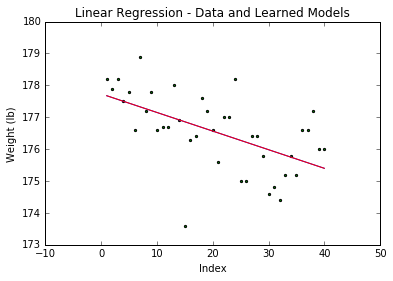

In [252]:
#Plot the data and learned lines
pyplot.scatter(data[0::, 0], data[0::, 1], marker='.', c='green')

pyplot.title('Linear Regression - Data and Learned Models')
pyplot.xlabel(header[0])
pyplot.ylabel(header[1])
pyplot.plot(data[0::, 0], data[0::, 0]*theta[1] + theta[0], color="blue")
pyplot.plot(data[0::, 0], data[0::, 0]*slope + intercept, color="red")
pyplot.show()

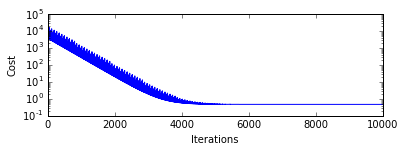

In [253]:
fig = pyplot.figure()
ax = fig.add_subplot(2,1,1)
line, = ax.plot(range(iterations), J_history, color="blue")
pyplot.xlabel('Iterations')
pyplot.ylabel('Cost')
ax.set_yscale('log')

pyplot.show()